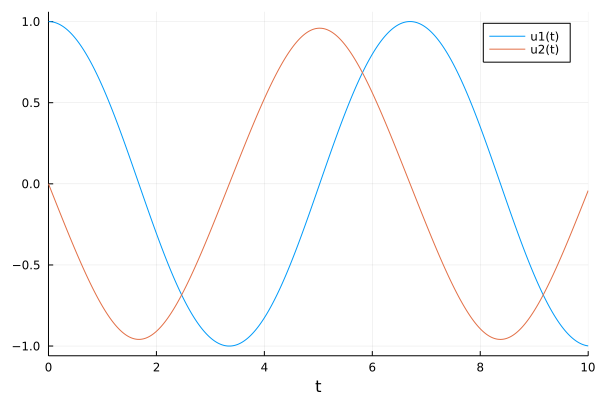

In [33]:
using DifferentialEquations, LinearAlgebra, Plots

# Time-evolution / Initial Value Problem (IVP)
# u(0) = 1, u'(0) = 0
# u'' = -sin(u)

# can be solved used Forward Euler (explicit)
# Can also be solved using Backward Euler but we didn't discuss (implicit)
# because linear is easy with Backward Euler, nonlinear is harder

u = solve(ODEProblem((u,_,t) -> [u[2], -sin(u[1])], [1,0], (0,10)))
plot(u)

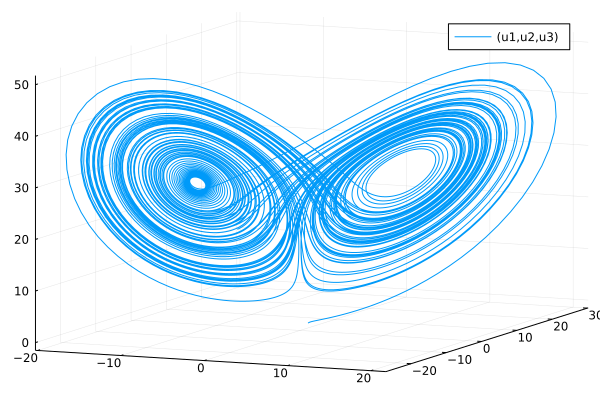

In [37]:
# Butterfly
# Vector problem with components u := [x,y,z]
# x' = σ*(y-x)
# y' = x*(ρ-z) - y
# z' = x*y-β*z

function butterfly(u, (σ,ρ,β), t)
    x,y,z = u
    [σ*(y-x), x*(ρ-z) - y, x*y-β*z]
end

u = solve(ODEProblem(butterfly, [1,0,0], (0,100), (10, 29, 8/3)))

plot(u; vars = (1,2,3))

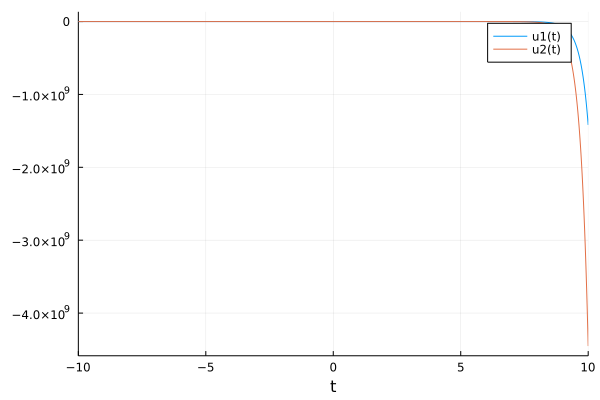

In [42]:
# Airy equation as an time-evolution IVP:
# u(-10) = 1
# u'(-10) = 0
# u'' = t * u


u = solve(ODEProblem((u,_,t) -> [u[2], t*u[1]], [1,0], (-10,10)))
plot(u)

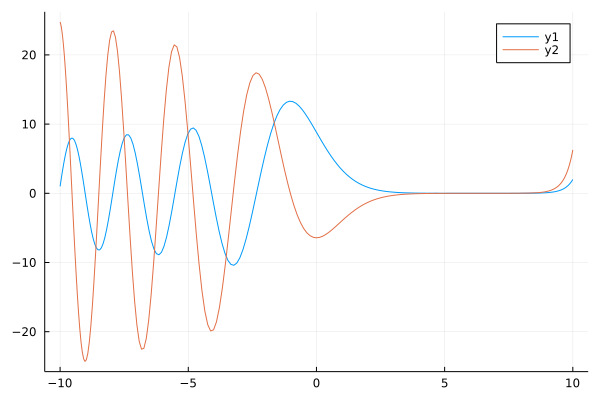

In [43]:
using ApproxFun

# Airy equation as a BVP
# u(-10) = c_0
# u(10) = c_1
# u'' = x *u


D = Derivative()
x = Fun(-10..10)

u = [Dirichlet();
    D^2 - x] \ [[1.,2.],0]

plot(u)
plot!(u')

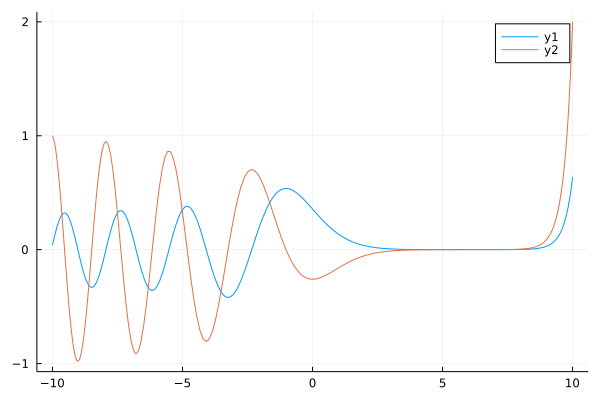

In [47]:

u = [lneumann();
    rneumann();
    D^2 - x] \ [1.,2., 0.]

plot(u)
plot!(u')